In [ ]:
!pip install kaggle


In [ ]:
import kagglehub
import pandas as pd
import os

# 1. Download dataset dari Kaggle
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Dataset berhasil di-download ke folder:")
print(path)

# 2. CARI FILE CSV DI DALAM FOLDER
csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]
print("\nFile CSV ditemukan:", csv_files)

if len(csv_files) == 0:
    raise FileNotFoundError("Tidak ada file CSV dalam folder dataset!")

# Ambil file pertama, biasanya:
# WA_Fn-UseC_-Telco-Customer-Churn.csv
csv_path = os.path.join(path, csv_files[0])

# 3. Load CSV
df = pd.read_csv(csv_path)
print("\nData berhasil diload! Shape:", df.shape)
df.head()


Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Dataset berhasil di-download ke folder:
/kaggle/input/telco-customer-churn

File CSV ditemukan: ['WA_Fn-UseC_-Telco-Customer-Churn.csv']

Data berhasil diload! Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# =====================================================
# 🧼 4) CLEANING DATASET
# =====================================================

# Bersihkan string dari spasi
for col in df.select_dtypes(include="object"):
    df[col] = df[col].astype(str).str.strip()

# Ubah TotalCharges ke numerik
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Hapus customerID karena tidak perlu untuk prediksi
if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

# Hapus baris TotalCharges kosong
df = df.dropna(subset=["TotalCharges"]).reset_index(drop=True)

print("Shape setelah cleaning:", df.shape)
df.head()


Shape setelah cleaning: (7032, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



=== INFO DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     70

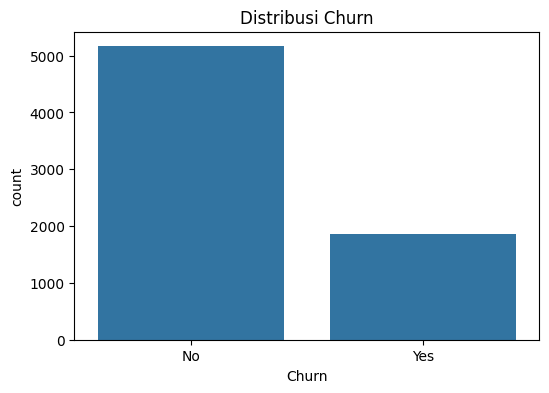

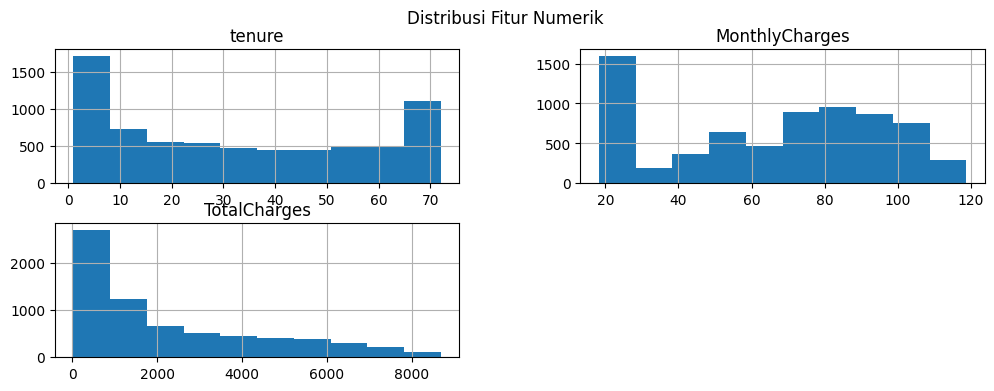

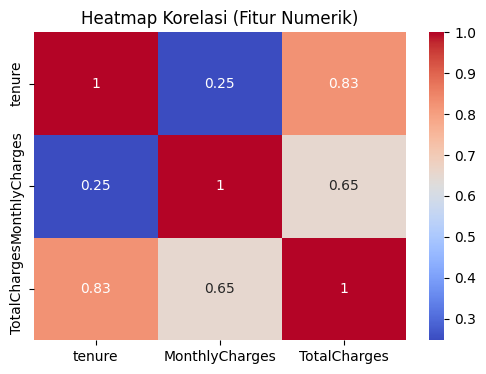

In [ ]:
# =====================================================
# 🔍 5) EDA (EXPLORATORY DATA ANALYSIS)
# =====================================================

# ---- 5.1 Info dataset ----
print("\n=== INFO DATASET ===")
print(df.info())

# ---- 5.2 Statistik deskriptif ----
print("\n=== STATISTIK DESKRIPTIF ===")
df.describe(include="all")

# ---- 5.3 Cek missing value ----
print("\n=== MISSING VALUE ===")
print(df.isna().sum())

# ---- 5.4 Distribusi target Churn ----
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df)
plt.title("Distribusi Churn")
plt.show()

# ---- 5.5 Histogram fitur numerik ----
df[["tenure", "MonthlyCharges", "TotalCharges"]].hist(figsize=(12,4))
plt.suptitle("Distribusi Fitur Numerik")
plt.show()

# ---- 5.6 Heatmap korelasi ----
plt.figure(figsize=(6,4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi (Fitur Numerik)")
plt.show()


In [ ]:
# =====================================================
# 🔥 SUB 3 — DIRECT MODELING (tanpa preprocessing pipeline)
# =====================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# --------------------------------------
# 1. Pisahkan fitur (X) dan target (y)
# --------------------------------------

X = df.drop(columns=["Churn"])
y = df["Churn"].map({"Yes": 1, "No": 0})   # ubah Yes/No → 1/0

# --------------------------------------
# 2. Train-Test Split (80:20)
# --------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --------------------------------------
# 3. Encoding Kategorikal pakai ORDINAL ENCODER
# --------------------------------------

cat_cols = X.select_dtypes(include="object").columns

encoder = OrdinalEncoder()

X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

X_train_enc[cat_cols] = encoder.fit_transform(X_train[cat_cols])
X_test_enc[cat_cols] = encoder.transform(X_test[cat_cols])

print("Encoding selesai. Contoh data:")
print(X_train_enc.head())

# --------------------------------------
# 4. Definisikan Model
# --------------------------------------

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Voting Classifier": VotingClassifier(
        estimators=[
            ("lr", LogisticRegression(max_iter=2000)),
            ("rf", RandomForestClassifier(n_estimators=200, random_state=42)),
        ],
        voting="soft"
    )
}

# --------------------------------------
# 5. Training + Evaluasi
# --------------------------------------

def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1 Score": f1_score(y_test, preds),
        "Confusion Matrix": confusion_matrix(y_test, preds)
    }

# Training dan evaluasi semua model
results = {}

for name, model in models.items():
    print(f"\n==============================")
    print(f" TRAINING MODEL: {name}")
    print(f"==============================")

    model.fit(X_train_enc, y_train)
    res = evaluate(model, X_test_enc, y_test)
    results[name] = res

    # Cetak hasil
    for metric, value in res.items():
        print(f"{metric}:\n{value}\n")

# --------------------------------------
# 6. Menampilkan semua hasil
# --------------------------------------

print("\n\n==== SUMMARY HASIL DIRECT MODELING ====")
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric, val in metrics.items():
        print(f"{metric}: {val}")


Encoding selesai. Contoh data:
      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1408     1.0              0      1.0         1.0      65           1.0   
6992     1.0              0      0.0         0.0      26           0.0   
3349     0.0              0      1.0         0.0      68           1.0   
4486     1.0              0      0.0         0.0       3           1.0   
3535     0.0              0      1.0         0.0      49           0.0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
1408            2.0              1.0             2.0           2.0   
6992            1.0              0.0             0.0           0.0   
3349            2.0              1.0             0.0           2.0   
4486            0.0              1.0             0.0           2.0   
3535            1.0              0.0             2.0           0.0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
1408               2.0  

In [ ]:
# =====================================================
# 🔥 SUB 4 — MODELING DENGAN PREPROCESSING PIPELINE
# =====================================================

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# --------------------------------------
# 1. Tentukan kolom numerik & kategorikal
# --------------------------------------

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

print("Kolom numerik :", list(num_cols))
print("Kolom kategorikal :", list(cat_cols))

# --------------------------------------
# 2. Preprocessing Pipeline
# --------------------------------------

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

# --------------------------------------
# 3. Buat 3 model dalam pipeline
# --------------------------------------

pipe_lr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=2000))
])

pipe_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(n_estimators=200, random_state=42))
])

pipe_voting = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", VotingClassifier(
        estimators=[
            ("lr", LogisticRegression(max_iter=2000)),
            ("rf", RandomForestClassifier(n_estimators=200))
        ],
        voting="soft"
    ))
])

models_preproc = {
    "Logistic Regression (Pipeline)": pipe_lr,
    "Random Forest (Pipeline)": pipe_rf,
    "Voting Classifier (Pipeline)": pipe_voting
}

# --------------------------------------
# 4. Training + Evaluasi
# --------------------------------------

def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1 Score": f1_score(y_test, preds),
        "Confusion Matrix": confusion_matrix(y_test, preds)
    }

results_preproc = {}

for name, pipe in models_preproc.items():
    print(f"\n==============================")
    print(f" TRAINING MODEL: {name}")
    print(f"==============================")

    pipe.fit(X_train, y_train)
    metrics = evaluate(pipe, X_test, y_test)
    results_preproc[name] = metrics

    for metric, value in metrics.items():
        print(f"{metric}:\n{value}\n")

# --------------------------------------
# 5. Menampilkan summary
# --------------------------------------

print("\n\n==== SUMMARY HASIL SUB 4 (Pipeline Models) ====")
for model_name, metrics in results_preproc.items():
    print(f"\nModel: {model_name}")
    for metric, val in metrics.items():
        print(f"{metric}: {val}")


Kolom numerik : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Kolom kategorikal : ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

 TRAINING MODEL: Logistic Regression (Pipeline)
Accuracy:
0.8038379530916845

Precision:
0.6484848484848484

Recall:
0.5721925133689839

F1 Score:
0.6079545454545454

Confusion Matrix:
[[917 116]
 [160 214]]


 TRAINING MODEL: Random Forest (Pipeline)
Accuracy:
0.7896233120113717

Precision:
0.6344827586206897

Recall:
0.4919786096256685

F1 Score:
0.5542168674698795

Confusion Matrix:
[[927 106]
 [190 184]]


 TRAINING MODEL: Voting Classifier (Pipeline)
Accuracy:
0.7853589196872779

Precision:
0.6161290322580645

Recall:
0.5106951871657754

F1 Score:
0.5584795321637427

Confusion Matrix:
[[914 119]
 [183 191]]



==== SUMMARY HASIL SUB 4 (Pipeline Mod

In [ ]:
# =====================================================
# 🔥 SUB 5 — HYPERPARAMETER TUNING (RandomForest + Pipeline)
# =====================================================

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# --------------------------------------
# 1. Buat Pipeline untuk RandomForest
# --------------------------------------

pipe_rf_tune = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

# --------------------------------------
# 2. Parameter yang mau dicari
# --------------------------------------

param_dist = {
    "model__n_estimators": [100, 200, 300, 400, 500],
    "model__max_depth": [None, 5, 10, 20, 30],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__bootstrap": [True, False]
}

print("Jumlah kombinasi parameter:",
      len(param_dist["model__n_estimators"]) *
      len(param_dist["model__max_depth"]) *
      len(param_dist["model__min_samples_split"]) *
      len(param_dist["model__min_samples_leaf"]) *
      len(param_dist["model__bootstrap"])
     )

# --------------------------------------
# 3. Setup RandomizedSearchCV
# --------------------------------------

rf_search = RandomizedSearchCV(
    estimator=pipe_rf_tune,
    param_distributions=param_dist,
    n_iter=20,           # jumlah kombinasi yang diuji
    cv=3,                # cross validation
    scoring="f1",        # evaluasi pakai F1 score
    n_jobs=-1,           # pakai semua CPU
    verbose=2,
    random_state=42
)

# --------------------------------------
# 4. Fit (Training Tuning)
# --------------------------------------

rf_search.fit(X_train, y_train)

print("\nBest Parameters:")
print(rf_search.best_params_)

best_model = rf_search.best_estimator_


Jumlah kombinasi parameter: 450
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters:
{'model__n_estimators': 500, 'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_depth': 10, 'model__bootstrap': True}


In [ ]:
# =====================================================
# 🎯 5. Evaluasi Model Terbaik
# =====================================================

best_preds = best_model.predict(X_test)

best_results = {
    "Accuracy": accuracy_score(y_test, best_preds),
    "Precision": precision_score(y_test, best_preds),
    "Recall": recall_score(y_test, best_preds),
    "F1 Score": f1_score(y_test, best_preds),
    "Confusion Matrix": confusion_matrix(y_test, best_preds)
}

print("\n=== HASIL TUNING MODEL TERBAIK ===")
for metric, val in best_results.items():
    print(f"{metric}:\n{val}\n")



=== HASIL TUNING MODEL TERBAIK ===
Accuracy:
0.7910447761194029

Precision:
0.6342281879194631

Recall:
0.5053475935828877

F1 Score:
0.5625

Confusion Matrix:
[[924 109]
 [185 189]]



In [ ]:
# =====================================================
# 🔥 SUB 6 — SAVE FINAL MODEL
# =====================================================

import joblib

# Simpan model terbaik hasil tuning
joblib.dump(best_model, "best_model.pkl")

print("🎉 Model berhasil disimpan sebagai: best_model.pkl")


🎉 Model berhasil disimpan sebagai: best_model.pkl
